In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random


In [2]:
ratings = pd.read_csv("ratings.csv")

In [3]:
ratings.shape

(27753444, 4)

In [4]:
ratings.iloc[:, 0:3].head(3) # Premieres lignes du fichier

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5


In [5]:
ratings["rating"].median()

3.5

In [6]:
ratings["rating"].mean()

3.5304452124932677

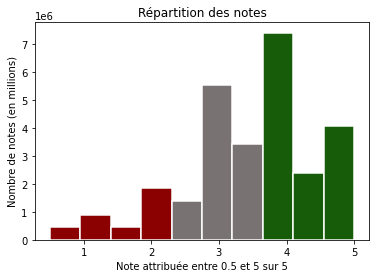

In [7]:
# Histogramme des notes
p = ratings["rating"].plot(kind='hist', edgecolor='white', linewidth=1.5, color='#8B0000')
 
p.patches[4].set_facecolor("#787272") # Gris
p.patches[5].set_facecolor("#787272")
p.patches[6].set_facecolor("#787272")

p.patches[7].set_facecolor("#175c08") # Vert
p.patches[8].set_facecolor("#175c08")
p.patches[9].set_facecolor("#175c08")

plt.title("Répartition des notes")
plt.xlabel("Note attribuée entre 0.5 et 5 sur 5")
plt.ylabel("Nombre de notes (en millions)")
plt.show()

In [8]:
# Fusion des fichiers en rapport avec les tags
tags_origin = pd.read_csv("tags.csv")
convert_tags = pd.read_csv("genome-tags.csv")
merged = tags_origin.merge(convert_tags)
score_tags = pd.read_csv("genome-scores.csv")
tags = merged.merge(score_tags)

# Fusion avec les films
movies = pd.read_csv("movies.csv")
tags = tags.merge(movies)

# Vérification (5 lignes prises au hasard)
tags.iloc[[0,11854,18957,254128,389874],[0,6,2,5]]

,userId,title,tag,relevance
0,14,Braveheart (1995),epic,0.97875
11854,266735,Inception (2010),thriller,0.76200
18957,120542,Cloud Atlas (2012),dystopia,0.89950
254128,257925,No Man's Land (2001),complex characters,0.46925
389874,279588,Tomorrow Never Dies (1997),action,0.98500


In [9]:
tags["relevance"].median()

0.8865000000000001

In [10]:
tags["relevance"].mean()

0.7942250600151449

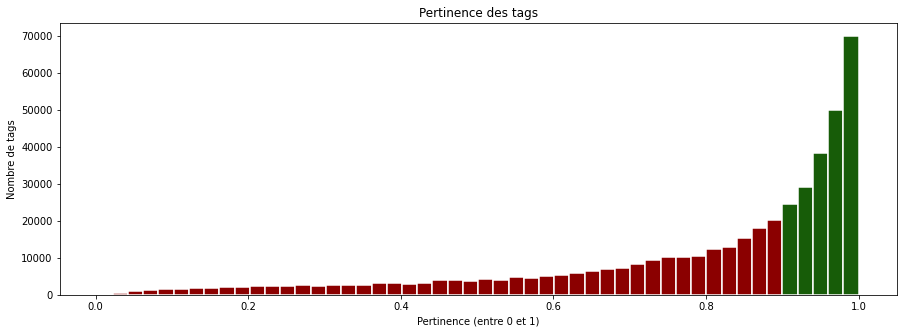

In [11]:
# Histogramme montrant la pertinence des tags
plt.figure(figsize=(15,5)) # Taille du graph
p = tags["relevance"].plot(kind='hist', edgecolor='white', linewidth=1.5, bins=50, color='#8B0000')
 
for bar in range(45,50):
    p.patches[bar].set_facecolor("#175c08") # Vert

plt.title("Pertinence des tags")
plt.xlabel("Pertinence (entre 0 et 1)")
plt.ylabel("Nombre de tags")
plt.show()

In [12]:
# On ne garde que les tags les plus pertinents
tags = tags[tags["relevance"]>0.90]

In [14]:
import time
tic = time.clock()
limit = 10 # On ne prend que les premiers utilisateurs pour éviter un temps de traitement trop long
ratings_cut = ratings[ratings["userId"] <= limit]

predictions = []

for user in pd.unique(ratings_cut["userId"]): 
    films_deja_vus = ratings_cut[ratings_cut['userId'] == user]
    films_liked = films_deja_vus[films_deja_vus['rating'] >= 4]["movieId"]
    films_disliked = films_deja_vus[films_deja_vus['rating'] <= 2]["movieId"]
    
    deja_vus = tags.merge(films_deja_vus['movieId'])
    liked = deja_vus.merge(films_liked)
    disliked = deja_vus.merge(films_disliked)
    
    genres_liked = pd.unique(liked["genres"])
    genres_disliked = pd.unique(disliked["genres"])
    
    tags_liked = pd.unique(liked["tagId"])
    tags_disliked = pd.unique(disliked["tagId"])
    
    prediction = [user,"Données insuffisantes pour conseiller un film",0]
    

    for movie in pd.unique(tags['movieId']): 
        
        df_one_movie = tags[tags['movieId'] == movie].reset_index(drop=True)
        
        points = 0

        # GENRE    
        if df_one_movie.at[0,'genres'] in genres_liked:
            points += 5
        if df_one_movie.at[0,'genres'] in genres_disliked:
            points -= 3
        
        # TAGS
        res = 0
        for tag in pd.unique(df_one_movie['tagId']):
            if tag in tags_liked:
                res += 2
            if tag in tags_disliked:
                res -= 1
        points += res


        
        if points > prediction[2] and movie not in films_deja_vus["movieId"]:
            prediction = [user, pd.unique(df_one_movie["title"])[0], points]
        elif points == prediction[2] and random.randint(0, 5) == 1:
            prediction = [user, pd.unique(df_one_movie["title"])[0], points]
                            
    predictions.append(prediction)

tac = time.clock()
print(tac-tic)    

for prediction in predictions:
    print(prediction)


    

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


297.692523
[1, 'Weird Science (1985)', 22]
[2, 'American Graffiti (1973)', 15]
[3, 'Saving Private Ryan (1998)', 29]
[4, 'Reservoir Dogs (1992)', 51]
[5, 'Pulp Fiction (1994)', 79]
[6, 'Pulp Fiction (1994)', 79]
[7, 'Munich (2005)', 25]
[8, 'Star Wars: Episode IV - A New Hope (1977)', 68]
[9, 'American Beauty (1999)', 35]
[10, 'Star Wars: Episode IV - A New Hope (1977)', 69]


C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
